In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
print(tf.__version__)

2.4.1


In [3]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('/data/car_evaluation.csv',names=cols, header=None)

In [4]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

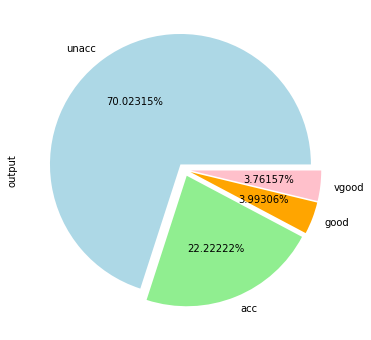

In [6]:
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))


In [7]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

In [8]:
X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)

In [9]:
labels.head()

,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [11]:
y = labels.values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [53]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model_tf = Model(inputs=input_layer, outputs=output)
model_tf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

NameError: name 'Model_tf' is not defined

In [16]:
print(model_tf.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                330       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model_tf.fit(X_train, y_train, batch_size=8, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
122/139 [=========================>....] - ETA: 0s - loss: 1.3445 - acc: 0.3829 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fec3c117158> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY

139/139 [==============================] - 0s 1ms/step - loss: 0.0129 - acc: 0.9997 - val_loss: 0.0506 - val_acc: 0.9819
Epoch 49/50
139/139 [==============================] - 0s 1ms/step - loss: 0.0137 - acc: 0.9951 - val_loss: 0.0504 - val_acc: 0.9819
Epoch 50/50
139/139 [==============================] - 0s 1ms/step - loss: 0.0123 - acc: 1.0000 - val_loss: 0.0554 - val_acc: 0.9783


In [19]:
score = model_tf.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 666us/step - loss: 0.0752 - acc: 0.9740
Test Score: 0.07517515122890472
Test Accuracy: 0.97398841381073


In [20]:
#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X,dtrain_Y)
    predictions = algorithm.predict(dtest_X)
    prediction_probabilities = algorithm.predict(dtest_X)
    print (algorithm)
    
    return predictions,prediction_probabilities,algorithm

In [22]:
y_pred,y_prob,model_obj=model(model_tf,X_train,y_train,X_test,y_test,X_train.columns)

44/44 [==============================] - 0s 810us/step - loss: 0.0183 - acc: 0.9964
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [25]:
from mosaicml import *
from mosaicml.constants import MLModelFlavours

In [93]:
@scoring_func
def score(model, request):
    payload = request.json["payload"]
    data = pd.DataFrame(eval(payload))
    prediction = pd.Series(model.predict(data))
    print (prediction)
    return prediction.tolist()

In [94]:
import requests
req = requests.Request()
req.json = {"payload":X_train.head(1).to_json(orient = 'records')}

In [95]:
req.json['payload']

'[{"price_high":0,"price_low":0,"price_med":0,"price_vhigh":1,"maint_high":0,"maint_low":0,"maint_med":0,"maint_vhigh":1,"doors_2":0,"doors_3":0,"doors_4":0,"doors_5more":1,"persons_2":0,"persons_4":0,"persons_more":1,"lug_capacity_big":1,"lug_capacity_med":0,"lug_capacity_small":0,"safety_high":1,"safety_low":0,"safety_med":0}]'

In [79]:
labels.head()

,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [96]:
sch = generate_schema(score,(model_obj, req),X_train)
print(sch)

Error while generating schema:
Data must be 1-dimensional
None


In [99]:
register_model(model_obj, score, name="CarEvaluation_ClassificationTENSORFLOW", 
                description="Classify Car basis the feature",
                flavour=MLModelFlavours.tensorflow, schema=sch,
                y_true=y_test, y_pred = y_pred, #y_pred=pd.Series(y_pred), 
                prob=y_pred, features=X_train.columns, 
               labels=["condition_acc","condition_good","condition_unacc","condition_vgood"], 
               init_script="" ,
                model_type="classification", 
                input_type="json", explain_ai=True, x_train=X_train, x_test=X_test, 
                y_train=y_train, y_test=y_test,
                feature_names=list(X_train.columns),feature_ids=list(X_train.columns),
                target_names=["condition_acc","condition_good","condition_unacc","condition_vgood"], 
                kyd=True, kyd_score =True)
print("Registering model")

Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


  X = X[:, np.newaxis]

2022-02-20 13:54:59,081 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:54:59,083 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:01,125 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:01,127 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:03,102 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:03,104 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:05,141 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:05,143 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:07,111 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:07,113 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:09,109 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:09,111 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:11,090 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:11,092 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:13,055 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:13,057 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:15,123 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:15,125 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:17,218 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:17,220 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:19,282 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:19,285 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:21,279 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:21,281 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:23,339 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:23,341 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:25,323 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:25,326 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:27,337 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:27,339 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:29,422 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:29,424 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:31,415 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:31,417 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:33,503 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:33,505 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:35,556 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:35,558 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:37,589 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:37,591 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:39,577 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2022-02-20 13:55:39,579 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]



[1/2] grid cells ██████████---------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]



[2/2] grid cells ████████████████████ Time elapsed: 0 seconds

2022-02-20 13:55:41,609 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2022-02-20 13:55:41,611 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[1/21] features -------------------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[2/21] features █------------------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[3/21] features ██------------------ Time elapsed: 0 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[4/21] features ███----------------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[5/21] features ████---------------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[6/21] features █████--------------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[7/21] features ██████-------------- Time elapsed: 0 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[8/21] features ███████------------- Time elapsed: 1 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[9/21] features ████████------------ Time elapsed: 1 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[10/21] features █████████----------- Time elapsed: 1 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[11/21] features ██████████---------- Time elapsed: 1 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[12/21] features ███████████--------- Time elapsed: 1 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[13/21] features ████████████-------- Time elapsed: 1 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[14/21] features █████████████------- Time elapsed: 1 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[15/21] features ██████████████------ Time elapsed: 1 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[16/21] features ███████████████----- Time elapsed: 2 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[17/21] features ████████████████---- Time elapsed: 2 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[18/21] features █████████████████--- Time elapsed: 2 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[19/21] features ██████████████████-- Time elapsed: 2 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[20/21] features ███████████████████- Time elapsed: 2 seconds

  X = X[:, np.newaxis]

  X = X[:, np.newaxis]



[21/21] features ████████████████████ Time elapsed: 2 seconds

2022-02-20 13:55:44,834 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2022-02-20 13:55:44,839 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used cross-entropy
2022-02-20 13:55:44,842 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 0.0036137625598726287
2022-02-20 13:55:44,990 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed [24, 26, 67, 86]
2022-02-20 13:55:44,991 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (1382, 4)
2022-02-20 13:55:44,995 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 0.014; oracle score 0.016


Registering model
